# Importando bibliotecas

In [1]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importando o dataset

In [2]:
!pip3 install wget
!wget https://raw.githubusercontent.com/gilliardrodrigues/gilliardrodrigues/master/Projeto%20de%20Introdu%C3%A7%C3%A3o%20%C3%A0%20Ci%C3%AAncia%20de%20Dados/student-mat.csv
clear_output()

In [3]:
student = pd.read_csv('student-mat.csv')


# Dataset escolhido

Este dataset foi tirado do Kaggle e possui uma amostra que aborda o desempenho dos alunos no ensino secundário de duas escolas portuguesas (Gabriel Pereira e Mousinho da Silveira) na disciplina de Matemática. Os atributos de dados incluem notas dos alunos, características demográficas e sociais relacionadas aos alunos e às escolas e foram coletados por meio de relatórios escolares e questionários.

[Link para o dataset](https://www.kaggle.com/dipam7/student-grade-prediction)


**Citação:**

> P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[Web Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)





# Ajustando o dataset

Antes de tudo, vamos dar uma olhada no dataset:

In [4]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Vamos checar se há algum valor nulo no dataset:

In [5]:
if(~student.isnull().sum().any()):
  print("Não há valores nulos no dataset!")
else:
  print("Há valores nulos no dataset!")

Não há valores nulos no dataset!


Vamos ver a porcentagem de alunos por escola:

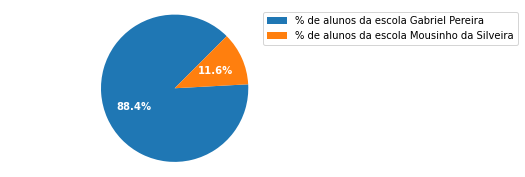

In [6]:
total_estudantes = len(student)
GP = len(student[student['school'] == 'GP'])
MS = len(student[student['school'] == 'MS'])
size = [GP/total_estudantes, MS/total_estudantes]
labels = ["% de alunos da escola Gabriel Pereira", "% de alunos da escola Mousinho da Silveira"]
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(size, autopct='%1.1f%%', startangle=45, textprops=dict(color="w"))
ax.legend(labels, loc = "best", bbox_to_anchor = (0.75, 1))
ax.axis('equal')
plt.setp(autotexts, size=10, weight="bold")
plt.show()

>Como podemos ver, nesta amostra a porcentagem de alunos da escola Gabriel Pereira é bem maior. Portanto, trabalharemos com ela.

In [7]:
# Selecionando apenas alunos da escola Gabriel Pereira (GP) e excluindo a coluna 'school' do dataset:
student = student[student['school'] == 'GP']
student.drop('school', inplace=True, axis=1)

# Objetivo

Dentre muitas outras variáveis, o dataset conta com as notas em Matemática dos 3 períodos: G1 (1º período), G2 (2º período) e G3 (3º período e último ano). Essas colunas serão removidas do dataset e no lugar delas colocaremos uma nova coluna chamada 'gradeAverage' representando a média das 3 notas para cada aluno. O objetivo aqui é tentar prever a nota média usando regressão e, utilizando classificação, tentar prever se cada aluno será aprovado ou reprovado (considerando que para ser aprovado a nota média deve ser maior ou igual a 12).

Além disso, queremos responder às seguintes perguntas **sobre os alunos da escola Gabriel Pereira**:

> 1) Ter um relacionamento amoroso prejudica o desempenho escolar em Matemática?

> 2) Alunos que almejam cursar o Ensino Superior performam melhor em Matemática?

> 3) Alunos cujos pais cursaram Ensino Superior performam melhor em Matemática?

> 4) Alunos filhos de professores performam melhor em Matemática?

> 5) Alunos que saem mais com os amigos possuem menor desempenho escolar? 

> 6) Não faltar de aula é um fator determinante no desempenho escolar do aluno?

> 7) O acesso a internet é um fator determinante na nota do aluno?


In [8]:
# Adicionando a nova coluna ao dataset:
student['gradeAverage'] = round((student['G1'] + student['G2'] + student['G3'])/3, 2) # Vamos utilizar 2 casas decimais para a nota média.
student.drop(['G1', 'G2', 'G3'], inplace=True, axis=1)

A fim de reduzir o escopo da nossa análise e também deixar de lado os atributos que não possuem relação com as perguntas que objetivamos responder, não utilizaremos as seguintes colunas: 'reason', 'guardian', 'paid', 'activities', 'nursery', 'freetime', 'famsize', 'traveltime', 'Dalc', 'Walc', 'health', 'famsup', 'famrel', 'age', 'sex', 'address' e 'Pstatus'.

In [9]:
colunas = ['reason', 'guardian', 'paid', 'activities', 'nursery', 'freetime', 'famsize', 'traveltime', 'Dalc', 'Walc', 'health', 'famsup', 'famrel', 'age', 'sex', 'address', 'Pstatus']
student.drop(colunas, inplace=True, axis=1)

# Minerando dados e características do dataset

Legenda das colunas:

In [10]:
array_columns = np.array([["Medu", "Escolaridade da mãe"], ["Fedu", "Escolaridade do pai"], ["Mjob", "Trabalho da mãe"], ["Fjob", "Trabalho do pai"], ["studytime", "Tempo de estudo semanal"], ["failures", "Número de falhas de classe anteriores"], ["schoolsup", "Suporte educacional extra"], ["higher", "Deseja cursar o ensino superior"], ["internet", "Acesso à internet em casa"], ["romantic", "Com um relacionamento romântico"], ["goout", "Sai com amigos"], ["absences", "Número de faltas escolares"], ["gradeAverage", "Nota média em Matemática"]])
columns_df = pd.DataFrame(array_columns, columns=["Nome no dataset", "Descrição"])
columns_df.index = columns_df.index + 1
columns_df

,Nome no dataset,Descrição
1,Medu,Escolaridade da mãe
2,Fedu,Escolaridade do pai
3,Mjob,Trabalho da mãe
4,Fjob,Trabalho do pai
5,studytime,Tempo de estudo semanal
6,failures,Número de falhas de classe anteriores
7,schoolsup,Suporte educacional extra
8,higher,Deseja cursar o ensino superior
9,internet,Acesso à internet em casa
10,romantic,Com um relacionamento romântico


>Legenda dos valores possíveis de cada coluna:

In [11]:
Medu = np.array([["0", "Nenhuma"], ["1", "Ensino Fundamental (4ª serie)"], ["2", "5ª a 9ª série"], ["3", "Ensino Médio"], ["4", "Ensino Superior"]])
Medu_df = pd.DataFrame(Medu, columns=["Valor (categórico)", "Escolaridade da mãe"])
display(Medu_df)
print("\n")
Fedu = np.array([["0", "Nenhuma"], ["1", "Ensino Fundamental (4ª serie)"], ["2", "5ª a 9ª série"], ["3", "Ensino Médio"], ["4", "Ensino Superior"]])
Fedu_df = pd.DataFrame(Fedu, columns=["Valor (categórico)", "Escolaridade do pai"])
display(Fedu_df)
print("\n")
Mjob = np.array([["teacher", "Professora"], ["health", "Profissional da saúde"], ["services", "Serviços civis (ex: Policial ou Administrativo)"], ["at_home", "Trabalha em casa"], ["other", "Outra profissão"]])
Mjob_df = pd.DataFrame(Mjob, columns=["Valor (categórico)", "Profissão da mãe"])
display(Mjob_df)
print("\n")
Fjob = np.array([["teacher", "Professor"], ["health", "Profissional da saúde"], ["services", "Serviços civis (ex: Policial ou Administrativo)"], ["at_home", "Trabalha em casa"], ["other", "Outra profissão"]])
Fjob_df = pd.DataFrame(Fjob, columns=["Valor (categórico)", "Profissão do pai"])
display(Fjob_df)
print("\n")
failures = np.array([["n", "0 <= n <= 3"]])
failures_df = pd.DataFrame(failures, columns=["Valor (numérico)", "Número de fracassos escolares anteriores"])
display(failures_df)
print("\n")
studytime = np.array([["1", "10 horas"], ["2", "20 horas"], ["3", "30 horas"], ["4", "40 horas"]])
studytime_df = pd.DataFrame(studytime, columns=["Valor (numérico)", "Tempo de estudo semanal extracurricular"])
display(studytime_df)
print("\n")
schoolsup = np.array([["no", "Não"], ["yes", "Sim"]])
schoolsup_df = pd.DataFrame(schoolsup, columns=["Valor (binário)", "Possui suporte educacional extra"])
display(schoolsup_df)
print("\n")
higher = np.array([["no", "Não"], ["yes", "Sim"]])
higher_df = pd.DataFrame(higher, columns=["Valor (binário)", "Pretende cursar o Ensino Superior"])
display(higher_df)
print("\n")
internet = np.array([["no", "Não"], ["yes", "Sim"]])
internet_df = pd.DataFrame(internet, columns=["Valor (binário)", "Possui internet em casa"])
display(internet_df)
print("\n")
romantic = np.array([["no", "Não"], ["yes", "Sim"]])
romantic_df = pd.DataFrame(romantic, columns=["Valor (binário)", "Possui relacionamento romântico"])
display(romantic_df)
print("\n")
goout = np.array([["1", "Raramente"], ["2", "Às vezes"], ["3", "Regularmente"], ["4", "Muito"], ["5", "Quase sempre"]])
goout_df = pd.DataFrame(goout, columns=["Valor (categórico)", "Frequência em que sai com os amigos"])
goout_df.index = goout_df.index + 1
display(goout_df)
print("\n")

,Valor (categórico),Escolaridade da mãe
0,0,Nenhuma
1,1,Ensino Fundamental (4ª serie)
2,2,5ª a 9ª série
3,3,Ensino Médio
4,4,Ensino Superior


,Valor (categórico),Escolaridade do pai
0,0,Nenhuma
1,1,Ensino Fundamental (4ª serie)
2,2,5ª a 9ª série
3,3,Ensino Médio
4,4,Ensino Superior


,Valor (categórico),Profissão da mãe
0,teacher,Professora
1,health,Profissional da saúde
2,services,Serviços civis (ex: Policial ou Administrativo)
3,at_home,Trabalha em casa
4,other,Outra profissão


,Valor (categórico),Profissão do pai
0,teacher,Professor
1,health,Profissional da saúde
2,services,Serviços civis (ex: Policial ou Administrativo)
3,at_home,Trabalha em casa
4,other,Outra profissão


,Valor (numérico),Número de fracassos escolares anteriores
0,n,0 <= n <= 3


,Valor (numérico),Tempo de estudo semanal extracurricular
0,1,10 horas
1,2,20 horas
2,3,30 horas
3,4,40 horas


,Valor (binário),Possui suporte educacional extra
0,no,Não
1,yes,Sim


,Valor (binário),Pretende cursar o Ensino Superior
0,no,Não
1,yes,Sim


,Valor (binário),Possui internet em casa
0,no,Não
1,yes,Sim


,Valor (binário),Possui relacionamento romântico
0,no,Não
1,yes,Sim


,Valor (categórico),Frequência em que sai com os amigos
1,1,Raramente
2,2,Às vezes
3,3,Regularmente
4,4,Muito
5,5,Quase sempre


O atributo 'Faltas' é uma variável numérica e representa o número de faltas do aluno, que varia de 0 a 93.

O atributo 'gradeAverage' é uma variável numérica e representa a média das notas dos 3 anos, que varia de 0 a 20

# Análise exploratória



>Plotando alguns gráficos a fim de visualizar melhor os dados:

## Nota dos alunos

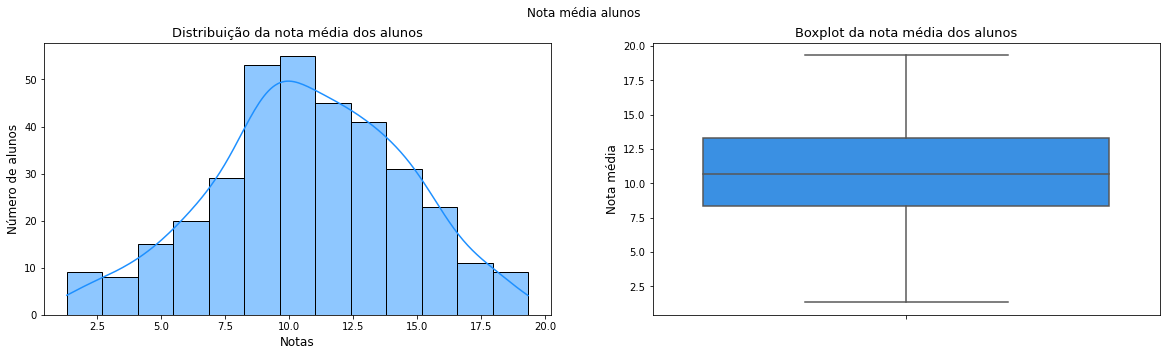

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

fig.suptitle('Nota média alunos')

sns.histplot(data=student, color='dodgerblue', x='gradeAverage', kde=True, ax = ax[0])
ax[0].set_title("Distribuição da nota média dos alunos", fontsize=13)
ax[0].set_xlabel("Notas", fontsize=12)
ax[0].set_ylabel("Número de alunos", fontsize=12)

sns.boxplot(y = student['gradeAverage'], color='dodgerblue', ax = ax[1])
ax[1].set_title("Boxplot da nota média dos alunos", fontsize=13)
ax[1].set_ylabel("Nota média", fontsize=12)

fig.show()

A nota dos alunos se aproxima de uma Normal, concentrando a maior parte das notas entre 8 e 13, sendo a nota mais comum 10.


## Escolaridade dos Pais

Para analisar essa questão, vamos criar uma nova coluna chamada 'ParentsEdu', unindo os dados de escolaridade do pai e da mãe:

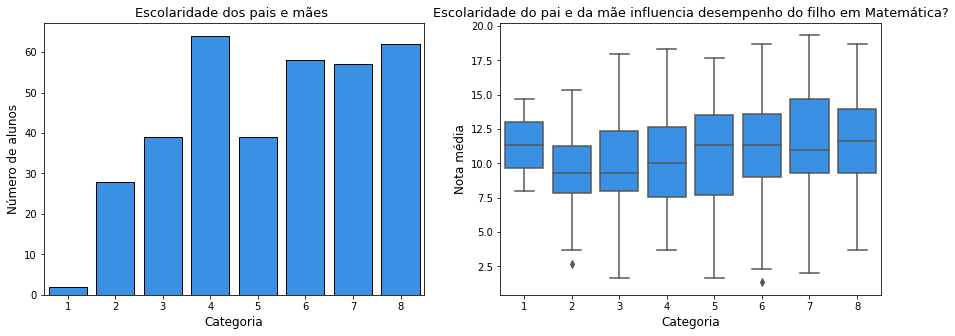

,Valor (categórico),Escolaridade:
1,1,Pelo menos um dos pais possui a 4ª série
2,2,Ambos os pais possuem a 4ª série
3,3,Pelo menos um dos pais possui da 5ª a 9ª série
4,4,Ambos os pais possuem da 5ª a 9ª série
5,5,Pelo menos um dos pais possui Ensino Médio
6,6,Ambos os pais possuem Ensino Médio
7,7,Pelo menos um dos pais possui Ensino Superior
8,8,Ambos os pais possuem Ensino Superior


In [13]:
student['ParentsEdu'] = student['Fedu'] + student['Medu'] # Criando a nova coluna
student.drop(['Fedu', 'Medu'], inplace=True, axis=1) # Removendo as duas colunas antigas do df
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(x='ParentsEdu', color='dodgerblue', ec='k', data=student)
plt.title('Escolaridade dos pais e mães ',fontsize=13)
plt.xlabel("Categoria",fontsize=12)
plt.ylabel("Número de alunos",fontsize=12)

plt.subplot(122)
sns.boxplot(x=student['ParentsEdu'], y=student['gradeAverage'], color='dodgerblue')
plt.title('Escolaridade do pai e da mãe influencia desempenho do filho em Matemática?',fontsize=13)
plt.xlabel("Categoria",fontsize=12)
plt.ylabel("Nota média",fontsize=12)
plt.show()

ParentsEdu = np.array([["1", "Pelo menos um dos pais possui a 4ª série"], ["2", "Ambos os pais possuem a 4ª série"], ["3", "Pelo menos um dos pais possui da 5ª a 9ª série"], ["4", "Ambos os pais possuem da 5ª a 9ª série"], ["5", "Pelo menos um dos pais possui Ensino Médio"], ["6", "Ambos os pais possuem Ensino Médio"], ["7", "Pelo menos um dos pais possui Ensino Superior"], ["8", "Ambos os pais possuem Ensino Superior"]])
ParentsEdu_df = pd.DataFrame(ParentsEdu, columns=["Valor (categórico)", "Escolaridade:"])
ParentsEdu_df.index = ParentsEdu_df.index + 1
display(ParentsEdu_df)

Observa-se uma tendência no deslocamentos das notas médias de acordo com o nível de escolaridade dos pais entre as categorias 2-8 (mesmo que haja uma inversão entre as categoria 7 e 8).

A nota média relativamente elevada para pais com a menor escolaridade mostrada pode ser explicada pelo fato de que apenas 2 alunos fazem parte dessa categoria, como podemos ver abaixo.


In [14]:
len(student[student['ParentsEdu'] == 1])

2

A escolaridade mais presente dos pais é 5ª até a 9ª série, seguida pelo Ensino Superior.


## Profissão dos Pais

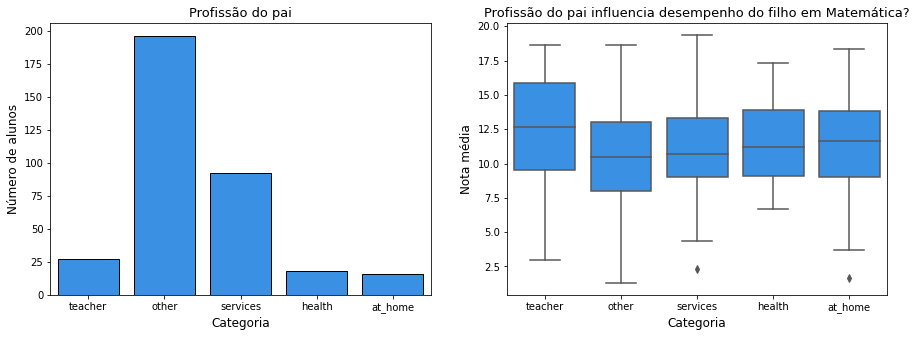

,Valor (categórico),Profissão do pai
0,teacher,Professor
1,health,Profissional da saúde
2,services,Serviços civis (ex: Policial ou Administrativo)
3,at_home,Trabalha em casa
4,other,Outra profissão


In [15]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(x='Fjob', color='dodgerblue', ec='k', data=student)
plt.title('Profissão do pai',fontsize=13)
plt.xlabel("Categoria",fontsize=12)
plt.ylabel("Número de alunos",fontsize=12)

plt.subplot(122)
sns.boxplot(x=student['Fjob'], y=student['gradeAverage'], color='dodgerblue')
plt.title('Profissão do pai influencia desempenho do filho em Matemática?',fontsize=13)
plt.xlabel("Categoria",fontsize=12)
plt.ylabel("Nota média",fontsize=12)
plt.show()
display(Fjob_df)

Os filhos de professores possuem mediana das notas médias acima das outras profissões. Da mesma forma, o 3º quartil dos boxplot's encontra-se consideravelmente acima das outras profissões analisadas.

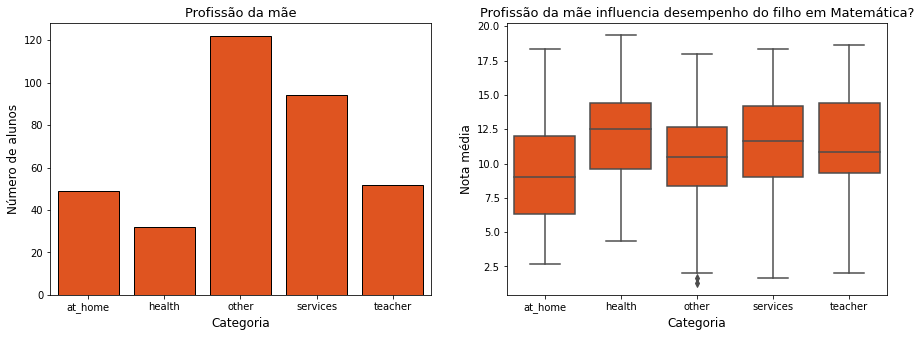

,Valor (categórico),Profissão da mãe
0,teacher,Professora
1,health,Profissional da saúde
2,services,Serviços civis (ex: Policial ou Administrativo)
3,at_home,Trabalha em casa
4,other,Outra profissão


In [16]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(x='Mjob', color='orangered', ec='k', data=student)
plt.title('Profissão da mãe',fontsize=13)
plt.xlabel("Categoria",fontsize=12)
plt.ylabel("Número de alunos",fontsize=12)

plt.subplot(122)
sns.boxplot(x=student['Mjob'], y=student['gradeAverage'], color='orangered')
plt.title('Profissão da mãe influencia desempenho do filho em Matemática?',fontsize=13)
plt.xlabel("Categoria",fontsize=12)
plt.ylabel("Nota média",fontsize=12)
plt.show()
display(Mjob_df)

Ao contrário da análise da profissão dos pais, não vemos uma relação tão clara de filhos de professoras conseguirem um desempenho melhor. Isso pode se dar pelo motivo de termos uma amostra maior de professoras mulheres do que de professores homens.

Neste plot também observa-se uma possível relação de pior desempenho para alunos filhos de mães que trabalham em casa.

A profissão "outro" foi a mais presente entre os pais e mães.

## Estudo

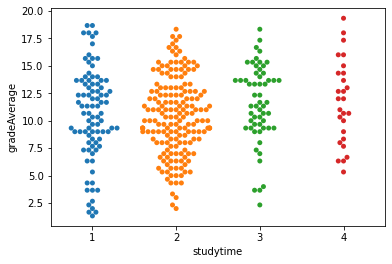

,Valor (numérico),Tempo de estudo semanal extracurricular
0,1,10 horas
1,2,20 horas
2,3,30 horas
3,4,40 horas


In [17]:
sns.swarmplot(x=student['studytime'], y=student['gradeAverage'])
plt.show()
display(studytime_df)

O tempo de estudo mais comum entre os estudantes é de 20 horas semanais, seguido de 10 e 30 horas semanais.

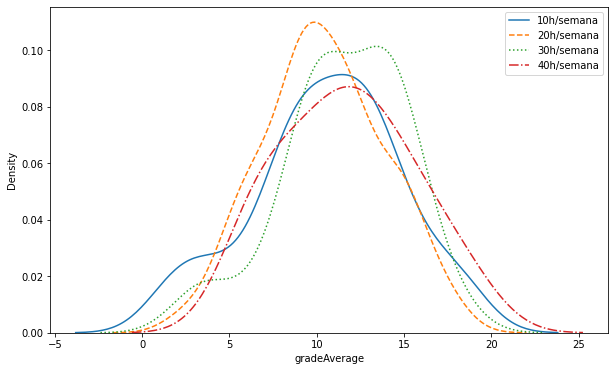

In [18]:
plt.figure(figsize=(10,6))
values = student['studytime'].unique()
values.sort()
labels = ['10h/semana', '20h/semana', '30h/semana', '40h/semana']
line_style = ['-', '--', ':', '-.']
for i in values:
  ax = sns.kdeplot(student.loc[student['studytime'] == i, 'gradeAverage'], label=labels[i-1])
  ax.lines[i-1].set_linestyle(line_style[i-1])
plt.legend()
plt.show()

Alunos que estudam apenas 10h/semana são os que possuem maior representatividade nas notas mais baixas, em meio a amostra utilizada.

Da mesma forma, alunos que estudam 40h/semana possuem maior representatividade nas notas mais altas.

Porém, a maioria dos alunos estão concentrados em notas medianas. Aparentemente existe uma pequena tendência do pico da função de densidade se deslocar de acordo com o grau de horas/semana, mas nada tão claro.

## Falhas escolares

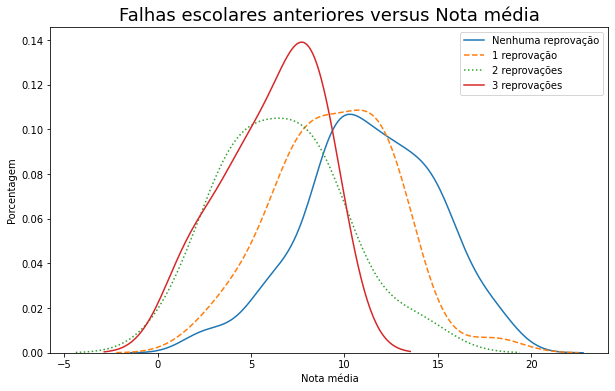

In [19]:
plt.figure(figsize=(10,6))
values = student['failures'].unique()
values.sort()
labels = ['Nenhuma reprovação', '1 reprovação', '2 reprovações', '3 reprovações']
line_style = ['-', '--', ':', '-.']
plt.title("Falhas escolares anteriores versus Nota média", fontsize=18)
for i in values:
  ax = sns.kdeplot(student.loc[student['failures'] == i, 'gradeAverage'], label=labels[i])
  ax.lines[i-1].set_linestyle(line_style[i-1])
  ax.set_ylabel('Porcentagem')
  ax.set_xlabel('Nota média')
plt.legend()
plt.show()

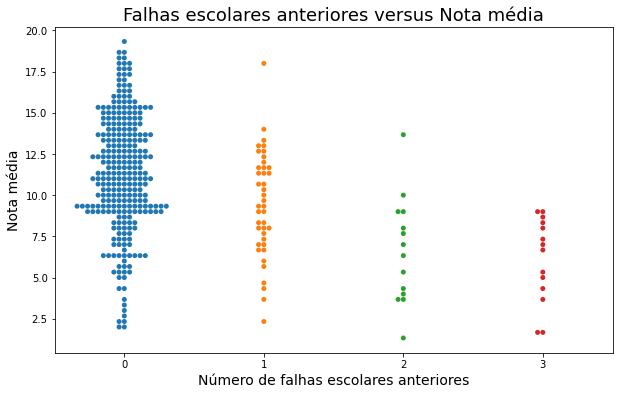

In [20]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=student['failures'], y=student['gradeAverage'])
plt.title("Falhas escolares anteriores versus Nota média", fontsize=18)
plt.xlabel("Número de falhas escolares anteriores", fontsize=14)
plt.ylabel("Nota média", fontsize=14)
plt.show()

A imensa maioria dos alunos nunca reprovou. Além disso, o número de reprovações escolares parece estar relacionado com a nota obtida, suspeita-se que menos reprovações permitem notas médias maiores.


## Suporte

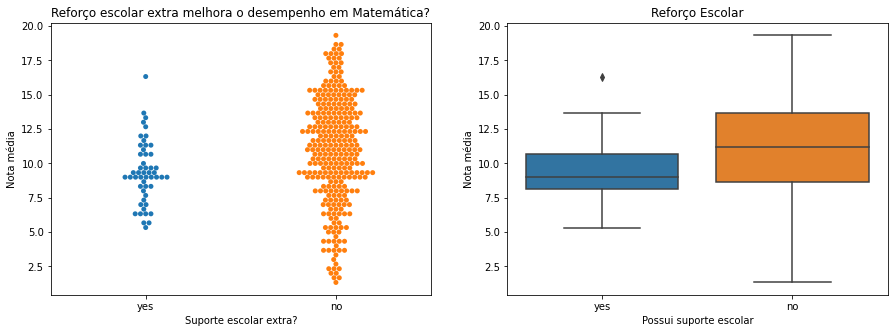

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.swarmplot(x=student['schoolsup'], y=student['gradeAverage'])
plt.title("Reforço escolar extra melhora o desempenho em Matemática?")
plt.xlabel("Suporte escolar extra?")
plt.ylabel("Nota média")

plt.subplot(122)
sns.boxplot(x=student['schoolsup'], y=student['gradeAverage'])
plt.title("Reforço Escolar")
plt.xlabel("Possui suporte escolar")
plt.ylabel("Nota média")
plt.show()

A maioria dos alunos não possuem suporte escolar. A mediana das notas médias aparenta ser maior para alunos sem suporte escolar extra.

Uma hipótese é que alunos com piores notas procuram suporte escolar, e alunos com melhores notas não precisam ou não querem.

## Perspectivas futuras

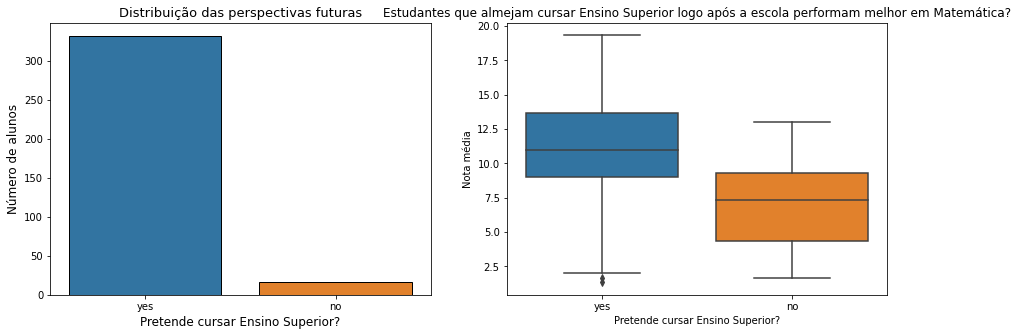

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(x='higher', ec='k', data=student,)
plt.title('Distribuição das perspectivas futuras',fontsize=13)
plt.xlabel("Pretende cursar Ensino Superior?",fontsize=12)
plt.ylabel("Número de alunos",fontsize=12)

plt.subplot(122)
sns.boxplot(x=student['higher'], y=student['gradeAverage'])
plt.title("Estudantes que almejam cursar Ensino Superior logo após a escola performam melhor em Matemática?")
plt.xlabel("Pretende cursar Ensino Superior?")
plt.ylabel("Nota média")
plt.show()

Aparenta existir uma relação clara onde alunos que pretendem cursar ensino superior possuem notas melhores que aqueles que não pretendem, no entanto deve-se levar em conta a pequena porcentagem de alunos que não pretendem cursar ensino superior.

## Acesso a internet

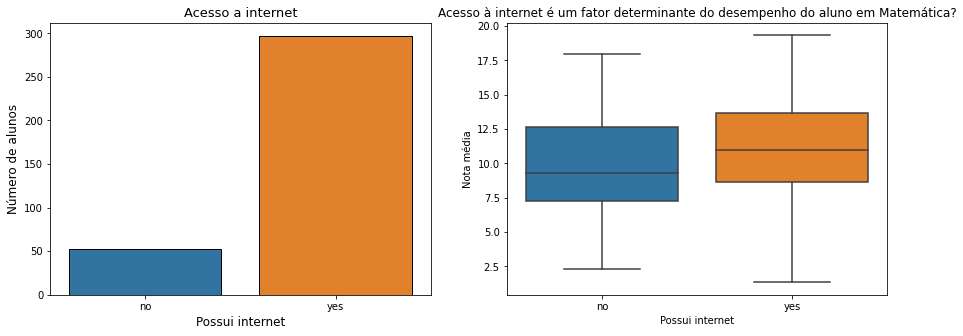

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(x='internet', ec='k', data=student,)
plt.title('Acesso a internet',fontsize=13)
plt.xlabel("Possui internet",fontsize=12)
plt.ylabel("Número de alunos",fontsize=12)

plt.subplot(122)
sns.boxplot(x=student['internet'], y=student['gradeAverage'])
plt.title("Acesso à internet é um fator determinante do desempenho do aluno em Matemática?")
plt.xlabel("Possui internet")
plt.ylabel("Nota média")
plt.show()

Aparenta existir uma relação clara onde alunos que possuem internet obtêm notas melhores do que aqueles que não possuem.

## Relacionamento social

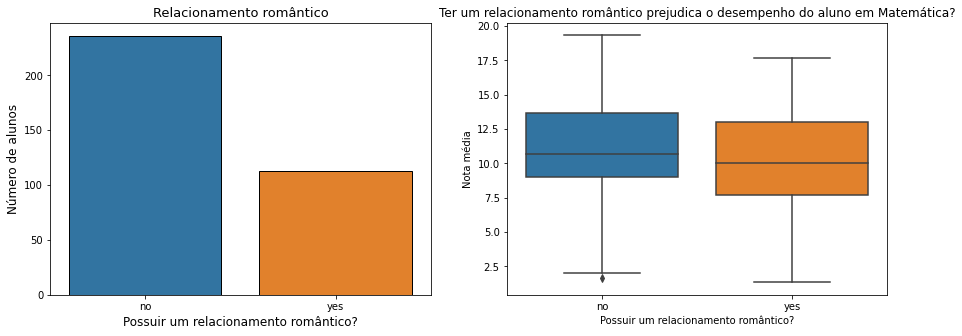

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(x='romantic', ec='k', data=student,)
plt.title('Relacionamento romântico',fontsize=13)
plt.xlabel("Possuir um relacionamento romântico?",fontsize=12)
plt.ylabel("Número de alunos",fontsize=12)

plt.subplot(122)
sns.boxplot(x=student['romantic'], y=student['gradeAverage'])
plt.title("Ter um relacionamento romântico prejudica o desempenho do aluno em Matemática?")
plt.xlabel("Possuir um relacionamento romântico?")
plt.ylabel("Nota média")
plt.show()

Existe uma relação aparente onde possuir relacionamento romântico piora o desempenho dos alunos. A amostra de alunos que se relacionam é consideravel.

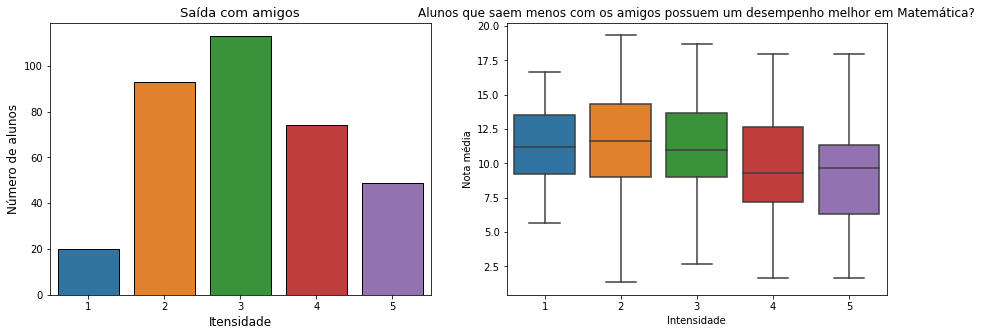

,Valor (categórico),Frequência em que sai com os amigos
1,1,Raramente
2,2,Às vezes
3,3,Regularmente
4,4,Muito
5,5,Quase sempre


In [25]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(x='goout', ec='k', data=student,)
plt.title('Saída com amigos',fontsize=13)
plt.xlabel("Itensidade",fontsize=12)
plt.ylabel("Número de alunos",fontsize=12)

plt.subplot(122)
sns.boxplot(x=student['goout'], y=student['gradeAverage'])
plt.title("Alunos que saem menos com os amigos possuem um desempenho melhor em Matemática?")
plt.xlabel("Intensidade")
plt.ylabel("Nota média")
plt.show()
display(goout_df)

A intensidade em que alunos saem com amigos aparenta afetar negativamente o desempenho escolar em matemática.

## Faltas Escolares

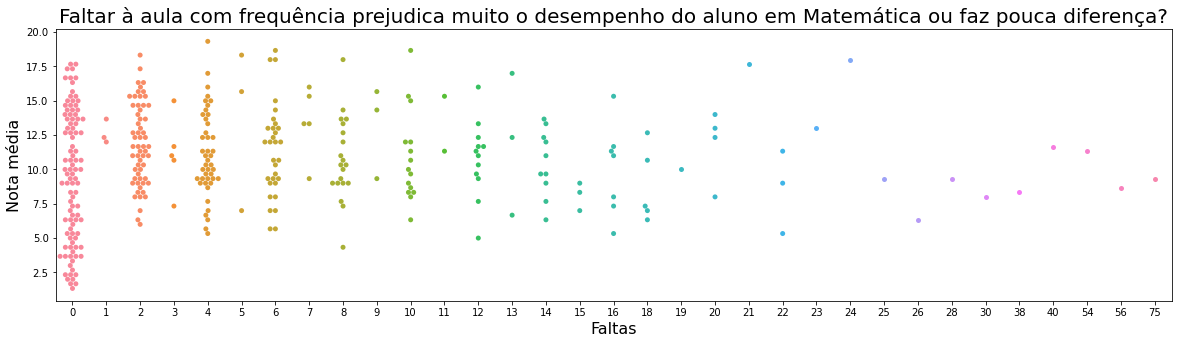

In [26]:
plt.figure(figsize=(20,5))
sns.swarmplot(x=student['absences'], y=student['gradeAverage'])
plt.title("Faltar à aula com frequência prejudica muito o desempenho do aluno em Matemática ou faz pouca diferença?", fontsize=20)
plt.xlabel("Faltas", fontsize=16)
plt.ylabel("Nota média", fontsize=16)
plt.show()

Como existem poucos alunos com muitas faltas (> 15), a análise da influencia das faltas é dificultada.

#Testes de Hipóteses

In [27]:
student_copy = student.copy()

Vamos criar duas funções: uma para fazer o Bootstrap e outra para calcular o intervalo de confiança a partir do Bootstrap:

In [28]:
def bootstrap_mean(target_column, num_samples):

  sample_size = len(target_column) # Define o tamanho da amostra
  values = np.zeros(num_samples) # Vetor que armazenará as médias
  for i in range(num_samples):
    sample = target_column.sample(sample_size, replace=True) # Gera amostras com reposição
    values[i] = sample.mean() # Armazena a média da amostra
  return values

def ic_bootstrap(target_column, num_samples, lower_limit, upper_limit):

  values = bootstrap_mean(target_column, num_samples)
  return (np.percentile(values, lower_limit), np.percentile(values, upper_limit))


## Pergunta 1: Ter um relacionamento amoroso prejudica o desempenho escolar em Matemática?

**Hipótese Nula**: A média dos alunos que possuem um relacionamento amoroso é igual à dos alunos que não possuem.

**Hipótese alternativa**: A média dos alunos que possuem um relacionamento amoroso é menor que a dos alunos que não possuem.

In [29]:
# Convertendo a variável categórica para numérica (binária):
student_copy['romantic'] = student_copy['romantic'].map({'no':0, 'yes':1})

In [30]:
# Separando o df em 2:
df_namora = student_copy[student_copy['romantic'] == 1]
df_nao_namora = student_copy[student_copy['romantic'] == 0]

Realizando o Bootstrap e dando uma olhada nas distribuições das médias:

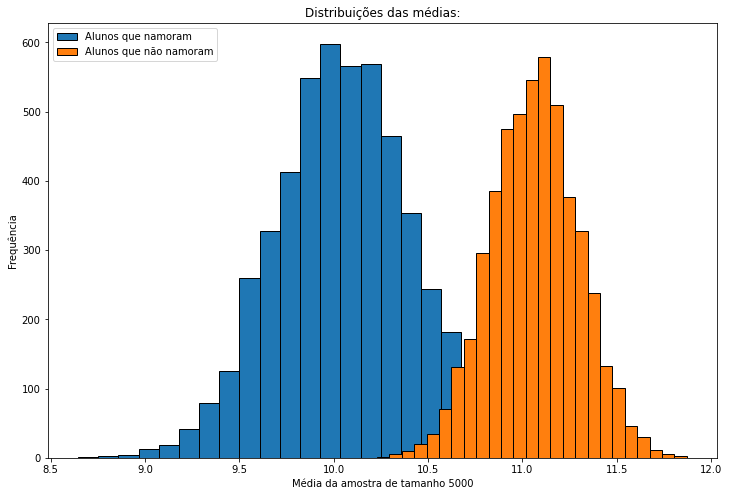

In [31]:
notas_medias1 = df_namora['gradeAverage']
notas_medias2 = df_nao_namora['gradeAverage']
bm1 = bootstrap_mean(notas_medias1, 5000)
bm2 = bootstrap_mean(notas_medias2, 5000)

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Distribuições das médias:")
plt.xlabel("Média da amostra de tamanho 5000")
plt.ylabel("Frequência")
ax.hist(bm1, ec='k', bins=25, label='Alunos que namoram')
ax.hist(bm2, ec='k', bins=25, label='Alunos que não namoram')
ax.legend()
plt.show()

Calculando os intervalos de confiança via Bootstrap:

In [32]:
# Com 95% de confiança:
ic_namora95 = ic_bootstrap(notas_medias1, 5000, 2.5, 97.5)
ic_nao_namora95 = ic_bootstrap(notas_medias2, 5000, 2.5, 97.5)

print("Intervalo de confiança de 95% para a média dos alunos que namoram: \n" + str(ic_namora95))
print("\n")
print("Intervalo de confiança de 95% para a média dos alunos que não namoram: \n" + str(ic_nao_namora95))

Intervalo de confiança de 95% para a média dos alunos que namoram: 
(9.359050884955753, 10.754601769911503)


Intervalo de confiança de 95% para a média dos alunos que não namoram: 
(10.597298728813557, 11.525403601694913)


Podemos observar que, ao utilizarmos um nível de confiança de 95%, podemos ver que há uma pequena sobreposição entre os dois intervalos de confiança.

Portanto, com um teste de **95%** de confiança, **não temos evidências suficientes para rejeitar a hipótese nula**, ou seja:

>**Não se pode afirmar** que ao repetir o mesmo experimento com outra amostra nas mesmas condições – mesmo tamanho, mesmo intervalo de confiança e composta por alunos da mesma escola – os alunos que não possuem um relacionamento amoroso apresentarão desempenho escolar em Matemática superior ao dos que possuem!

In [33]:
# Com 90% de confiança:
ic_namora90 = ic_bootstrap(notas_medias1,5000, 5, 95)
ic_nao_namora90 = ic_bootstrap(notas_medias2, 5000, 5, 95)

print("Intervalo de confiança de 90% para a média dos alunos que namoram: \n" + str(ic_namora90))
print("\n")
print("Intervalo de confiança de 90% para a média dos alunos que não namoram: \n" + str(ic_nao_namora90))

Intervalo de confiança de 90% para a média dos alunos que namoram: 
(9.461774336283188, 10.6220796460177)


Intervalo de confiança de 90% para a média dos alunos que não namoram: 
(10.667747881355927, 11.45472457627118)


Agora, ao utilizarmos um **nível de confiança de 90%**, não há sobreposição entre os dois intervalos de confiança. Além disso, intervalo da média das notas médias dos alunos que não namoram é superior!

Tal fato nos fornece evidências suficientes para **rejeitar a hipótese nula**, que dizia que as médias eram iguais e, por consequência, deveria haver uma sobreposição nos intervalos.

>Logo, podemos afirmar que, ao repetir o mesmo experimento com outra amostra nas mesmas condições – mesmo tamanho, mesmo intervalo de confiança e composta por alunos da mesma escola – os alunos que não possuem um relacionamento amoroso apresentarão desempenho escolar em Matemática superior ao dos que possuem!

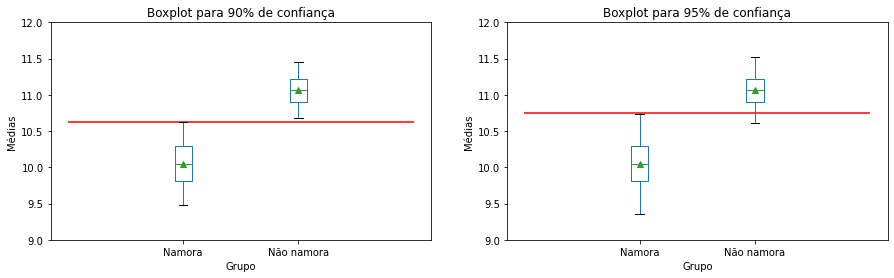

In [34]:
# Criando um novo DataFrame para plotar o boxplot das médias:
to_plot1 = pd.DataFrame()
to_plot1['Namora'] = bm1
to_plot1['Não namora'] = bm2

plt.figure(figsize=(15,4))

# Plotando um gráfico de boxplot para comparar os intervalos de confiança de 90%:
plt.subplot(121)
to_plot1.boxplot(grid=False, sym='', whis=[5, 95], showmeans=True)
plt.title("Boxplot para 90% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(9, 12)
plt.hlines(ic_namora90[1], 0, 3, colors='r')

# Plotando um gráfico de boxplot para comparar os intervalos de confiança de 95%:
plt.subplot(122)
to_plot1.boxplot(grid=False, sym='', whis=[2.5, 97.5], showmeans=True)
plt.title("Boxplot para 95% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(9, 12)
plt.hlines(ic_namora95[1], 0, 3, colors='r')

plt.show()

Os dois gráficos acima nos permitem visualizar melhor a ausência de sobreposição dos intervalos com 90% de confiança e a presença de sobreposição dos intervalos com 95%, confirmando as conclusões apresentadas anteriormente!

## Pergunta 2: Alunos que almejam cursar o Ensino Superior performam melhor em Matemática?

**Hipótese Nula**: A média dos alunos que pretendem cursar o Ensino Superior é igual à dos alunos que não pretendem.

**Hipótese alternativa**: A média dos alunos que pretendem cursar o Ensino Superior é maior que a dos alunos que não pretendem.

In [35]:
# Convertendo a variável categórica para numérica (binária):
student_copy['higher'] = student_copy['higher'].map({'no':0, 'yes':1})

In [36]:
# Separando o df em 2:
df_pretende = student_copy[student_copy['higher'] == 1]
df_nao_pretende = student_copy[student_copy['higher'] == 0]

Realizando o Bootstrap e dando uma olhada nas distribuições das médias:

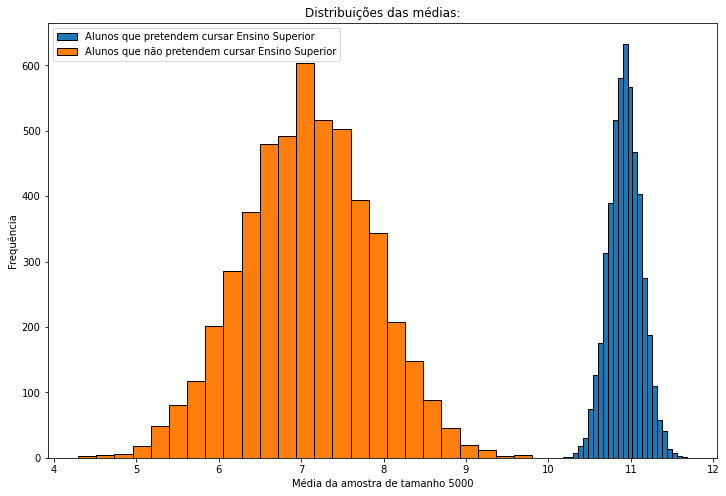

In [37]:
notas_medias1 = df_pretende['gradeAverage']
notas_medias2 = df_nao_pretende['gradeAverage']
bm1 = bootstrap_mean(notas_medias1, 5000)
bm2 = bootstrap_mean(notas_medias2, 5000)

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Distribuições das médias:")
plt.xlabel("Média da amostra de tamanho 5000")
plt.ylabel("Frequência")
ax.hist(bm1, ec='k', bins=25, label='Alunos que pretendem cursar Ensino Superior')
ax.hist(bm2, ec='k', bins=25, label='Alunos que não pretendem cursar Ensino Superior')
ax.legend()
plt.show()

Calculando os intervalos de confiança via Bootstrap:

In [38]:
# Com 95% de confiança:
ic_pretende95 = ic_bootstrap(notas_medias1,5000, 2.5, 97.5)
ic_nao_pretende95 = ic_bootstrap(notas_medias2, 5000, 2.5, 97.5)

print("Intervalo de confiança de 95% para a média dos alunos que pretendem cursar o Ensino Superior:\n" + str(ic_pretende95))
print("\n")
print("Intervalo de confiança de 95% para a média dos alunos que não pretendem cursar o Ensino Superior:\n" + str(ic_nao_pretende95))

Intervalo de confiança de 95% para a média dos alunos que pretendem cursar o Ensino Superior:
(10.536642319277101, 11.314888554216866)


Intervalo de confiança de 95% para a média dos alunos que não pretendem cursar o Ensino Superior:
(5.550000000000001, 8.51060294117647)


Podemos observar que, utilizando um **nível de confiança de 95%**, não há sobreposição entre os dois intervalos de confiança. Além disso, intervalo da média das notas médias dos alunos que pretendem cursar o Ensino Superior é superior ao dos que não pretendem!

Tal fato nos fornece evidências suficientes para **rejeitar a hipótese nula**, que dizia que as médias eram iguais e, por consequência, deveria haver uma sobreposição nos intervalos.

>Logo, podemos afirmar que, ao repetir o mesmo experimento com outra amostra nas mesmas condições – mesmo tamanho, mesmo intervalo de confiança e composta por alunos da mesma escola – os alunos que pretendem cursar Ensino Superior apresentarão desempenho escolar em Matemática superior ao dos alunos que não pretendem!

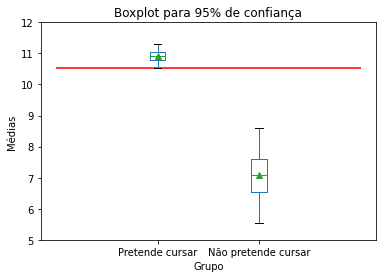

In [39]:
# Criando um novo DataFrame para plotar o boxplot das médias:
to_plot2 = pd.DataFrame()
to_plot2['Pretende cursar'] = bm1
to_plot2['Não pretende cursar'] = bm2

to_plot2.boxplot(grid=False, sym='', whis=[2.5, 97.5], showmeans=True)
plt.title("Boxplot para 95% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(5, 12)
plt.hlines(ic_pretende95[0], 0, 3, colors='r')

plt.show()

O gráfico acima nos permite visualizar melhor a ausência de sobreposição dos intervalos de confiaça de 95%, reforçando a conclusão apresentada anteriormente!

## Pergunta 3: Alunos cujos pais cursaram Ensino Superior performam melhor em Matemática?



**Hipótese Nula**: A média dos alunos em que pelo menos um dos pais possui Ensino Superior é igual à média dos alunos em que nenhum dos pais possui Ensino Superior.

**Hipótese alternativa**: A média dos alunos em que pelo menos um dos pais possui Ensino Superior é superior à média dos alunos em que nenhum dos pais possui Ensino Superior.

In [40]:
# Separando o df em 2:
df_pais_com_ES = student_copy[student_copy['ParentsEdu'] >= 7]
df_pais_sem_ES = student_copy[student_copy['ParentsEdu'] < 7]

Realizando o Bootstrap e dando uma olhada nas distribuições das médias:

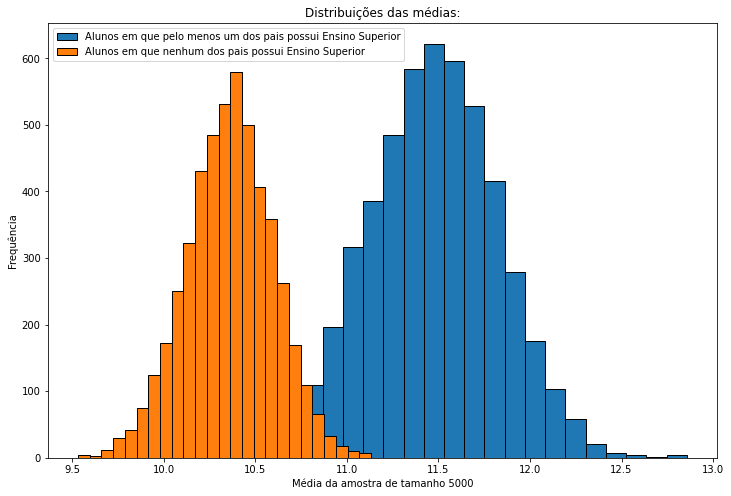

In [41]:
notas_medias1 = df_pais_com_ES['gradeAverage']
notas_medias2 = df_pais_sem_ES['gradeAverage']
bm1 = bootstrap_mean(notas_medias1, 5000)
bm2 = bootstrap_mean(notas_medias2, 5000)

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Distribuições das médias:")
plt.xlabel("Média da amostra de tamanho 5000")
plt.ylabel("Frequência")
ax.hist(bm1, ec='k', bins=25, label='Alunos em que pelo menos um dos pais possui Ensino Superior')
ax.hist(bm2, ec='k', bins=25, label='Alunos em que nenhum dos pais possui Ensino Superior')
ax.legend()
plt.show()

Calculando os intervalos de confiança via Bootstrap:

In [42]:
# Com 95% de confiança:
ic_pais_com_ES95 = ic_bootstrap(notas_medias1,5000, 2.5, 97.5)
ic_pais_sem_ES95 = ic_bootstrap(notas_medias2, 5000, 2.5, 97.5)

print("Intervalo de confiança de 95% para a média dos alunos em que pelo menos um dos pais possui Ensino Superior: \n" + str(ic_pais_com_ES95))
print("\n")
print("Intervalo de confiança de 95% para a média dos alunos em que nenhum dos pais possui Ensino Superior: \n" + str(ic_pais_sem_ES95))

Intervalo de confiança de 95% para a média dos alunos em que pelo menos um dos pais possui Ensino Superior: 
(10.772384453781505, 12.139915966386551)


Intervalo de confiança de 95% para a média dos alunos em que nenhum dos pais possui Ensino Superior: 
(9.87656304347826, 10.801429347826085)


Podemos observar que, ao utilizarmos um nível de confiança de 95%, podemos ver que há uma pequena sobreposição entre os dois intervalos de confiança.

Portanto, com um teste de **95%** de confiança, **não temos evidências suficientes para rejeitar a hipótese nula**, ou seja:

>**Não se pode afirmar** que ao repetir o mesmo experimento com outra amostra nas mesmas condições – mesmo tamanho, mesmo intervalo de confiança e composta por alunos da mesma escola – os alunos em que pelo menos um dos pais possui Ensino Superior apresentarão desempenho escolar em Matemática superior ao dos alunos em que nenhum dos pais possui Ensino Superior!

In [43]:
# Com 90% de confiança:
ic_pais_com_ES90 = ic_bootstrap(notas_medias1,5000, 5, 95)
ic_pais_sem_ES90 = ic_bootstrap(notas_medias2, 5000, 5, 95)

print("Intervalo de confiança de 90% para a média dos alunos em que pelo menos um dos pais possui Ensino Superior: \n" + str(ic_pais_com_ES90))
print("\n")
print("Intervalo de confiança de 90% para a média dos alunos em que nenhum dos pais possui Ensino Superior: \n" + str(ic_pais_sem_ES90))

Intervalo de confiança de 90% para a média dos alunos em que pelo menos um dos pais possui Ensino Superior: 
(10.895966386554628, 12.061563025210083)


Intervalo de confiança de 90% para a média dos alunos em que nenhum dos pais possui Ensino Superior: 
(9.967760869565213, 10.746247826086954)


Agora, ao utilizar um **nível de confiança de 90%**, não há sobreposição entre os dois intervalos de confiança. Além disso, intervalo da média das notas médias dos alunos em que pelo menos um dos pais possui Ensino Superior é superior!

Tal fato nos fornece evidências suficientes para **rejeitar a hipótese nula**, que dizia que as médias eram iguais e, por consequência, deveria haver uma sobreposição nos intervalos.

>Logo, podemos afirmar que, ao repetir o mesmo experimento com outra amostra nas mesmas condições – mesmo tamanho, mesmo intervalo de confiança e composta por alunos da mesma escola – os alunos em que pelo menos um dos pais possui Ensino Superior apresentarão desempenho escolar em Matemática superior ao dos alunos em que nenhum dos pais possui Ensino Superior!

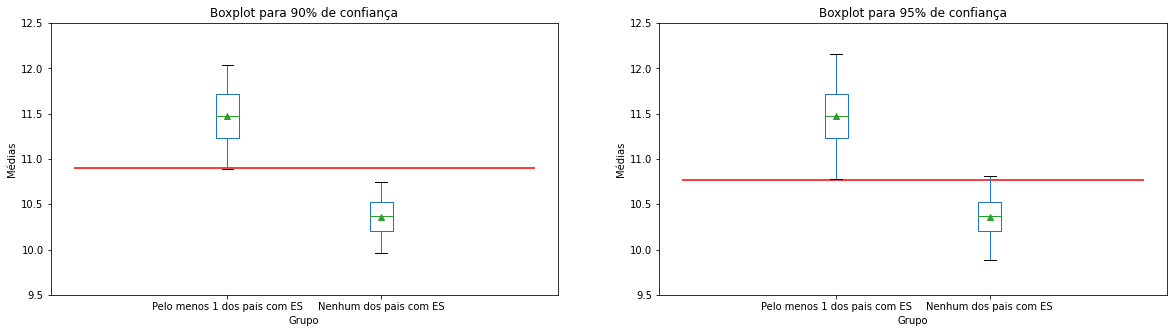

In [44]:
# Criando um novo DataFrame para plotar o boxplot das médias:
to_plot3 = pd.DataFrame()
to_plot3['Pelo menos 1 dos pais com ES'] = bm1
to_plot3['Nenhum dos pais com ES'] = bm2

plt.figure(figsize=(20,5))

# Plotando um gráfico de boxplot para comparar os intervalos de confiança de 90%:
plt.subplot(121)
to_plot3.boxplot(grid=False, sym='', whis=[5, 95], showmeans=True)
plt.title("Boxplot para 90% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(9.5, 12.5)
plt.hlines(ic_pais_com_ES90[0], 0, 3, colors='r')

# Plotando um gráfico de boxplot para comparar os intervalos de confiança de 95%:
plt.subplot(122)
to_plot3.boxplot(grid=False, sym='', whis=[2.5, 97.5], showmeans=True)
plt.title("Boxplot para 95% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(9.5, 12.5)
plt.hlines(ic_pais_com_ES95[0], 0, 3, colors='r')

plt.show()

Os dois gráficos acima nos permitem visualizar melhor a ausência de sobreposição dos intervalos com 90% de confiança e a presença de sobreposição dos intervalos com 95%, confirmando as conclusões apresentadas anteriormente!

## Pergunta 4: Alunos filhos de professores performam melhor em Matemática?


**Hipótese Nula**: A média dos alunos em que pelo menos um dos pais é professor(a) é igual à média dos alunos em que nenhum dos pais é professor(a).

**Hipótese Alternativa**: A média dos alunos em que pelo menos um dos pais possui é professor(a) é superior à média dos alunos em que nenhum dos pais é professor(a).


In [45]:
df_pais_prof = student_copy[(student_copy['Mjob'] == 'teacher') | (student_copy['Fjob'] == 'teacher') ]
df_pais_n_prof = student_copy[(student_copy['Mjob'] != 'teacher') & (student_copy['Fjob'] != 'teacher') ]

Realizando o Bootstrap e dando uma olhada nas distribuições das médias:

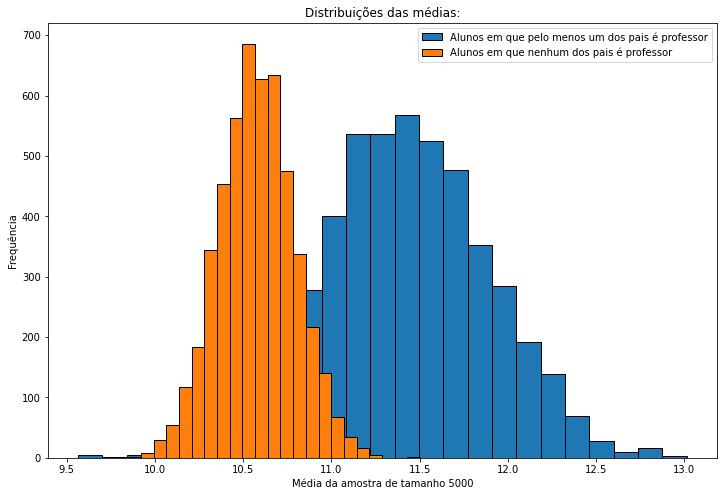

In [46]:


notas_medias1 = df_pais_prof['gradeAverage']
notas_medias2 = df_pais_n_prof['gradeAverage']

bm1 = bootstrap_mean(notas_medias1, 5000)
bm2 = bootstrap_mean(notas_medias2, 5000)

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Distribuições das médias:")
plt.xlabel("Média da amostra de tamanho 5000")
plt.ylabel("Frequência")
ax.hist(bm1, ec='k', bins=25, label='Alunos em que pelo menos um dos pais é professor')
ax.hist(bm2, ec='k', bins=25, label='Alunos em que nenhum dos pais é professor')
ax.legend()
plt.show()

Calculando os intervalos de confiança via Bootstrap:

In [47]:
# Com 95% de confiança:
ic_pais_prof95 = ic_bootstrap(notas_medias1,5000, 2.5, 97.5)
ic_pais_n_prof95 = ic_bootstrap(notas_medias2, 5000, 2.5, 97.5)

print("Intervalo de confiança de 95% para a média dos alunos em que pelo menos um dos pais é professor: \n" + str(ic_pais_prof95))
print("\n")
print("Intervalo de confiança de 95% para a média dos alunos em que nenhum dos pais é professor: \n" + str(ic_pais_n_prof95))

Intervalo de confiança de 95% para a média dos alunos em que pelo menos um dos pais é professor: 
(10.435731617647058, 12.33794485294118)


Intervalo de confiança de 95% para a média dos alunos em que nenhum dos pais é professor: 
(10.167040035587185, 10.989348754448399)


Podemos observar que, utilizando um **nível de confiança de 95%**, há sobreposição entre os dois intervalos de confiança. 

Portanto, com um teste de **95%** de confiança, **não temos evidências suficientes para rejeitar a hipótese nula**, ou seja:

>**Não se pode se afirmar** que, ao repetir o mesmo experimento com outra amostra nas mesmas condições, mesmo tamanho e composta por alunos da mesma escola – os alunos que possuem pais professores possuirão médias maiores do que os que não possuem.





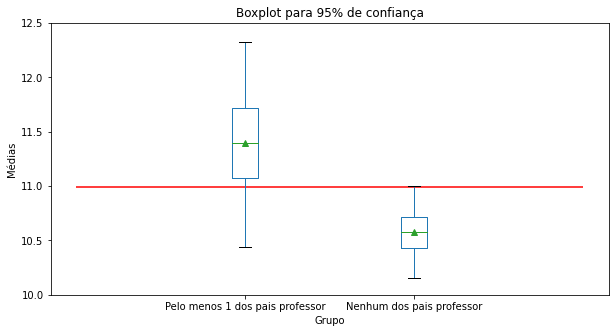

In [48]:
to_plot4 = pd.DataFrame()
to_plot4['Pelo menos 1 dos pais professor'] = bm1
to_plot4['Nenhum dos pais professor'] = bm2

plt.figure(figsize=(10,5))

to_plot4.boxplot(grid=False, sym='', whis=[2.5, 97.5], showmeans=True)
plt.title("Boxplot para 95% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(10, 12.5)
plt.hlines(ic_pais_n_prof95[1], 0, 3, colors='r')

plt.show()

O gráfico acima nos permite visualizar melhor a sobreposição dos intervalos de confiaça de 95%, reforçando a conclusão apresentada anteriormente!

## Pergunta 5: Alunos que saem mais com os amigos possuem menor desempenho escolar em Matemática? 

**Hipótese Nula**: A média dos alunos que saem muito com os amigos é igual a média dos alunos que saem pouco ou nada com os amigos.

**Hipótese Alternativa**: A média dos alunos que saem muito com os amigos é inferior à média dos alunos que saem pouco ou nada com os amigos.


goout = 0, 1, 2: Pouco ou nada

goout = 4, 5: Muito

In [49]:
df_saem_muito = student_copy[student_copy['goout'] >= 4]
df_saem_pouco = student_copy[student_copy['goout'] <= 2]

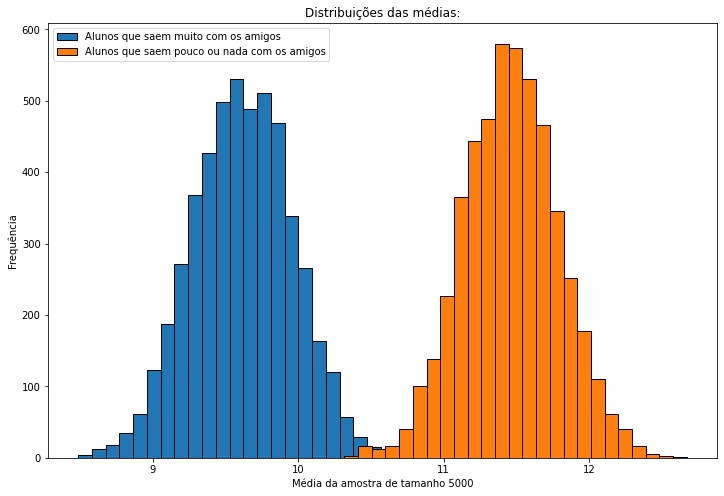

In [50]:
notas_medias1 = df_saem_muito['gradeAverage']
notas_medias2 = df_saem_pouco['gradeAverage']
bm1 = bootstrap_mean(notas_medias1, 5000)
bm2 = bootstrap_mean(notas_medias2, 5000)

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Distribuições das médias:")
plt.xlabel("Média da amostra de tamanho 5000")
plt.ylabel("Frequência")
ax.hist(bm1, ec='k', bins=25, label='Alunos que saem muito com os amigos')
ax.hist(bm2, ec='k', bins=25, label='Alunos que saem pouco ou nada com os amigos')
ax.legend()
plt.show()

In [51]:
# Com 95% de confiança:
ic_saem_muito95 = ic_bootstrap(notas_medias1, 5000, 2.5, 97.5)
ic_saem_pouco95 = ic_bootstrap(notas_medias2, 5000, 2.5, 97.5)

print("Intervalo de confiança de 95% para a média dos alunos que saem muito com os amigos: \n" + str(ic_saem_muito95))
print("\n")
print("Intervalo de confiança de 95% para a média dos alunos que saem pouco ou nada com os amigos: \n" + str(ic_saem_pouco95))

Intervalo de confiança de 95% para a média dos alunos que saem muito com os amigos: 
(8.940237804878048, 10.270898373983735)


Intervalo de confiança de 95% para a média dos alunos que saem pouco ou nada com os amigos: 
(10.817068584070793, 12.106515486725668)


Podemos observar que, utilizando um **nível de confiança de 95%**, não há sobreposição entre os dois intervalos de confiança.

Logo, temos evidências suficientes para **rejeitar a hipótese nula** com tal intervalo de confiança, que dizia que as médias eram iguais, já que não há uma sobreposição nos intervalos.

>**Pode se afirmar** que, ao repetir o mesmo experimento com outra amostra nas mesmas condições, mesmo tamanho e composta por alunos da mesma escola – os alunos que saem mais com os amigos possuirão médias piores em 95% dos casos.

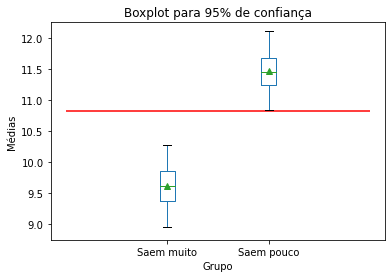

In [52]:
# Criando um novo DataFrame para plotar o boxplot das médias:
to_plot5 = pd.DataFrame()
to_plot5['Saem muito'] = bm1
to_plot5['Saem pouco'] = bm2

to_plot5.boxplot(grid=False, sym='', whis=[2.5, 97.5], showmeans=True)
plt.title("Boxplot para 95% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(8.75, 12.25)
plt.hlines(ic_saem_pouco95[0], 0, 3, colors='r')

plt.show()

O gráfico acima nos permite visualizar melhor a ausência de sobreposição dos intervalos de confiaça de 95%, reforçando a conclusão apresentada anteriormente!

## Pergunta 6: Não faltar de aula é um fator determinante no desempenho escolar do aluno em Matemática?

**Hipótese Nula**: A média dos alunos que faltam muito de aula é igual a dos alunos que faltam pouco ou não faltam

**Hipótese Alternativa**: A média dos alunos que faltam muito de aula é menor do que as dos alunos que faltam pouco ou não faltam

Faltam muito: faltas >= 12

Faltam pouco: faltas <= 5

In [53]:
df_faltam_muito = student_copy[student_copy['absences'] >= 10]
df_faltam_pouco = student_copy[student_copy['absences'] <= 5]

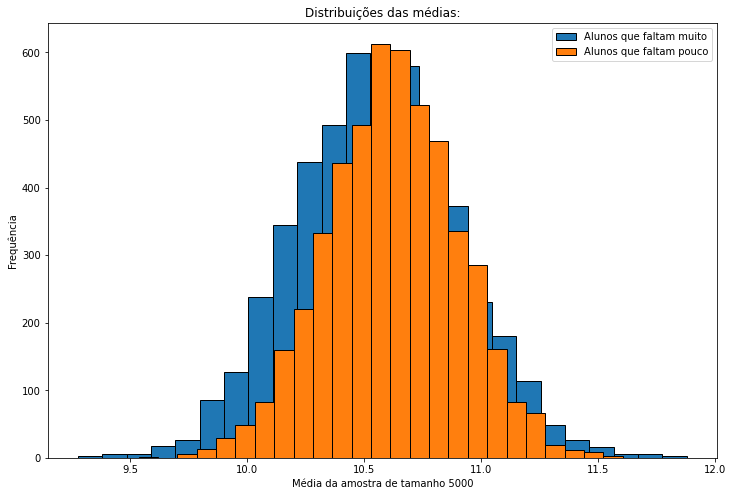

In [54]:
notas_medias1 = df_faltam_muito['gradeAverage']
notas_medias2 = df_faltam_pouco['gradeAverage']
bm1 = bootstrap_mean(notas_medias1, 5000)
bm2 = bootstrap_mean(notas_medias2, 5000)

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Distribuições das médias:")
plt.xlabel("Média da amostra de tamanho 5000")
plt.ylabel("Frequência")
ax.hist(bm1, ec='k', bins=25, label='Alunos que faltam muito')
ax.hist(bm2, ec='k', bins=25, label='Alunos que faltam pouco')
ax.legend()
plt.show()

In [55]:
# Com 95% de confiança:
ic_faltam_muito95 = ic_bootstrap(notas_medias1, 5000, 2.5, 97.5)
ic_faltam_pouco95 = ic_bootstrap(notas_medias2, 5000, 2.5, 97.5)

print("Intervalo de confiança de 95% para a média dos alunos que faltam muito: \n" + str(ic_faltam_muito95))
print("\n")
print("Intervalo de confiança de 95% para a média dos alunos que faltam pouco: \n" + str(ic_faltam_pouco95))

Intervalo de confiança de 95% para a média dos alunos que faltam muito: 
(9.87805194805195, 11.254944805194803)


Intervalo de confiança de 95% para a média dos alunos que faltam pouco: 
(10.07923474178403, 11.160987089201878)


Podemos observar que, utilizando um **nível de confiança de 95%**, há sobreposição entre os dois intervalos de confiança.

Portanto, com um teste de **95%** de confiança, **não temos evidências suficientes para rejeitar a hipótese nula**, ou seja:

>**Não se pode se afirmar** que, ao repetir o mesmo experimento com outra amostra nas mesmas condições, mesmo tamanho e composta por alunos da mesma escola – os alunos que faltam mais possuirão médias piores do que os que faltam menos.

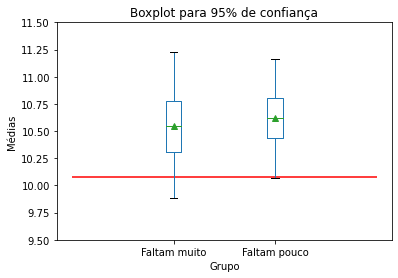

In [56]:
# Criando um novo DataFrame para plotar o boxplot das médias:
to_plot6 = pd.DataFrame()
to_plot6['Faltam muito'] = bm1
to_plot6['Faltam pouco'] = bm2

to_plot6.boxplot(grid=False, sym='', whis=[2.5, 97.5], showmeans=True)
plt.title("Boxplot para 95% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(9.5, 11.5)
plt.hlines(ic_faltam_pouco95[0], 0, 3, colors='r')

plt.show()

O gráfico acima nos permite visualizar melhor a presença de sobreposição dos intervalos de confiaça de 95%, reforçando a conclusão apresentada anteriormente!

## Pergunta 7: O acesso a internet é um fator determinante na nota do aluno em Matemática?

**Hipótese Nula:** A média dos alunos que possuem internet é igual a média dos alunos que não possuem internet.

**Hipótese Alternativa:** A média dos alunos que possuem internet é maior que a média dos alunos que não possuem internet.


In [57]:
# Convertendo a variável categórica para numérica (Binária):
student_copy['internet'] = student_copy['internet'].map({'no':0, 'yes':1})

In [58]:
# Separando em 'com uso de internet' e 'sem uso de internet':
student_internet = student_copy[student_copy['internet'] == 1]
student_sem_internet = student_copy[student_copy['internet'] == 0]

Realizando o Bootstrap e dando uma olhada nas distribuições das médias:

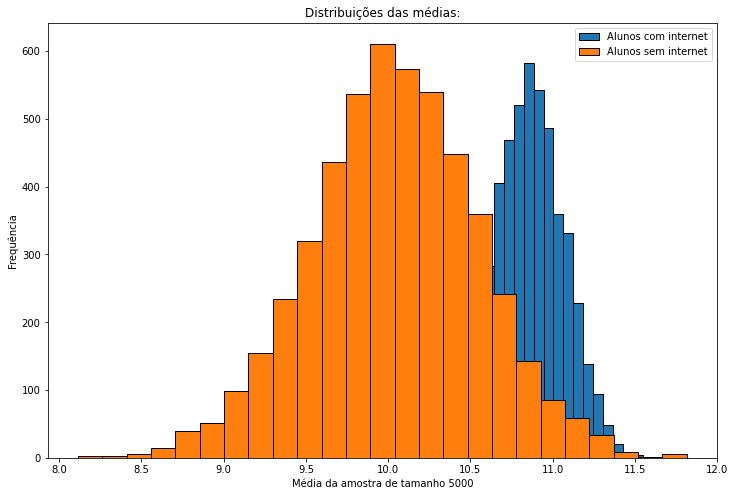

In [59]:
notas_medias_internet = student_internet['gradeAverage']
notas_medias_sem_internet = student_sem_internet['gradeAverage']

bootstrap_media_1 = bootstrap_mean(notas_medias_internet, 5000)
bootstrap_media_2 = bootstrap_mean(notas_medias_sem_internet, 5000)

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Distribuições das médias:")
plt.xlabel("Média da amostra de tamanho 5000")
plt.ylabel("Frequência")
ax.hist(bootstrap_media_1, ec='k', bins=25, label='Alunos com internet')
ax.hist(bootstrap_media_2, ec='k', bins=25, label='Alunos sem internet')
ax.legend()
plt.show()

Calculando os intervalos de confiança via Bootstrap:

In [60]:
# Com 95% de confiança:
ic_internet_95 = ic_bootstrap(notas_medias_internet,5000, 2.5, 97.5)
ic_sem_internet_95 = ic_bootstrap(notas_medias_sem_internet, 5000, 2.5, 97.5)

print("Intervalo de confiança de 95% para a média dos alunos que fazem uso de internet: " + str(ic_internet_95))
print("\n")
print("Intervalo de confiança de 95% para a média dos alunos que não fazem uso de internet: " + str(ic_sem_internet_95))

Intervalo de confiança de 95% para a média dos alunos que fazem uso de internet: (10.439274410774402, 11.267018518518517)


Intervalo de confiança de 95% para a média dos alunos que não fazem uso de internet: (9.076576923076923, 11.019562499999997)


Podemos observar que ao utilizarmos um **nível de confiança de 95%**, podemos ver que há uma pequena sobreposição entre os dois intervalos de confiança.

Com isso, os testes indicam que **não temos evidências suficientes para rejeitar a hipótese nula**; ou seja:

>**Não se pode afirmar** que ao repetir o mesmo experimento com outra amostra nas mesmas condições – mesmo tamanho, mesmo intervalo de confiança e composta por alunos da mesma escola – os alunos em que fazem uso da internet em contraposição dos que não fazem uso apresentarão um maior nota média em Matemática.

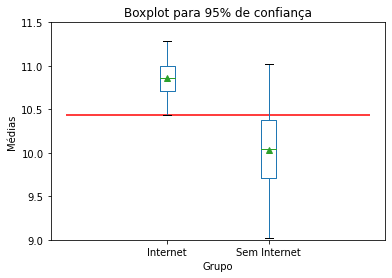

In [61]:
# Criando um novo DataFrame para plotar o boxplot das médias:
to_plot1 = pd.DataFrame()
to_plot1['Internet'] = bootstrap_media_1
to_plot1['Sem Internet'] = bootstrap_media_2

to_plot1.boxplot(grid=False, sym='', whis=[2.5, 97.5], showmeans=True)
plt.title("Boxplot para 95% de confiança")
plt.xlabel("Grupo")
plt.ylabel("Médias")
plt.ylim(9, 11.5)
plt.hlines(ic_internet_95[0], 0, 3, colors='r')

plt.show()

O gráfico acima nos permite visualizar melhor a presença de sobreposição dos intervalos de confiaça de 95%, reforçando a conclusão apresentada anteriormente!

# Previsão da nota média através de regressões

Antes de tudo, vamos remover do DataFrame as únicas 2 linhas que possuem 'ParentsEdu' = 1, pois caso contrário, a menos que fique exatamente 1 no teste e um no treino, as matrizes terão dimensões incompatíveis após o One Hot Encoding:

In [62]:
student = student[student['ParentsEdu'] != 1]

## Separando dados de treino e teste

In [63]:
X = student.drop('gradeAverage', axis=1) # Variáveis features
y = student['gradeAverage'] # Variável target

In [64]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.3, random_state=42)

## Z-normalizando colunas numéricas do treino

In [65]:
from sklearn.preprocessing import StandardScaler

y_scaler = StandardScaler()

X_train_df[['studytime', 'failures', 'absences']] -= X_train_df[['studytime', 'failures', 'absences']].mean()
X_train_df[['studytime', 'failures', 'absences']] /= X_train_df[['studytime', 'failures', 'absences']].std(ddof=1)
y_train = y_scaler.fit_transform(y_train_df.values[:, np.newaxis]) # O np.newaxis aumenta uma dimensão na matriz

## Convertendo variáveis categóricas em numéricas

Como a regressão só trabalha com variáveis numéricas, vamos converter as variáveis categóricas em numéricas.

In [66]:
# Como as colunas abaixo são variáveis binárias, a função map é suficiente para convertê-las:
X_train_df['schoolsup'] = X_train_df['schoolsup'].map({'no' : 0, 'yes' : 1})
X_train_df['romantic'] = X_train_df['romantic'].map({'no':0, 'yes':1})
X_train_df['higher'] = X_train_df['higher'].map({'no':0, 'yes':1})
X_train_df['internet'] = X_train_df['internet'].map({'no':0, 'yes':1})

In [67]:
# Fazendo o one-hot encoding:
X_train_df = pd.get_dummies(X_train_df, columns=['Mjob', 'Fjob', 'ParentsEdu', 'goout'])

In [68]:
# Conferindo se o DataFrame está correto:
X_train_df.head()

,studytime,failures,schoolsup,higher,internet,romantic,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,ParentsEdu_2,ParentsEdu_3,ParentsEdu_4,ParentsEdu_5,ParentsEdu_6,ParentsEdu_7,ParentsEdu_8,goout_1,goout_2,goout_3,goout_4,goout_5
79,-0.064668,-0.439648,0,1,1,0,0.690641,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
341,-0.064668,0.978950,0,1,1,0,-0.665425,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
18,-1.268484,3.816147,0,1,1,0,1.142663,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
260,-0.064668,-0.439648,0,1,1,1,1.707691,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
104,-0.064668,-0.439648,0,1,1,0,-0.665425,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [69]:
X_train = X_train_df.values # Agora está pronto para a regressão!

## Escolhendo e treinando o modelo

In [70]:
from sklearn.linear_model import LinearRegression # Sem regularização
from sklearn.linear_model import Lasso # Com regularização (L1)
from sklearn.linear_model import Ridge # Com regularização (L2)
from sklearn.linear_model import ElasticNetCV # Com regularização (combina L1 com L2) já escolhendo bons hiperparâmetros
from sklearn.model_selection import GridSearchCV # Para escolher o melhor hiperparâmetro para o modelo

Fazendo validação cruzada e procurando os melhores hiperparâmetros para cada modelo:

In [71]:
lm = LinearRegression(fit_intercept=False)
lasso = GridSearchCV(Lasso(fit_intercept=False), # Procura os melhores parâmetros no modelo Lasso
                     cv=5, # Fazendo validação cruzada de k folds
                     refit=True, # Após achar os melhores parâmetros, retorna o modelo já treinado
                     param_grid={'alpha':[0.001, 0.01, 0.1, 1, 10, 100]})  # Procura a regularização com parâmetros nessa faixa
ridge = GridSearchCV(Ridge(fit_intercept=False),
                     cv=5,
                     refit=True,
                     param_grid={'alpha':[0.001, 0.01, 0.1, 1, 10, 100]})
elasticNet = ElasticNetCV(fit_intercept=False,
                          l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          alphas=[0.001, 0.01, 0.1, 1, 10, 100],
                          cv=5,
                          )

Dando uma olhada no R² de cada modelo:

In [72]:
lm.fit(X_train, y_train)
print('R² da regressão linear sem regularização: {0}'.format(lm.score(X_train, y_train)))
lasso = lasso.fit(X_train, y_train)
print('R² da regressão linear com regularização Lasso: {0}'.format(lasso.score(X_train, y_train)))
ridge = ridge.fit(X_train, y_train)
print('R² da regressão linear com regularização Ridge: {0}'.format(ridge.score(X_train, y_train)))
elasticNet = elasticNet.fit(X_train, y_train)
print('R² da regressão linear com regularização ElasticNet: {0}'.format(elasticNet.score(X_train, y_train)))

R² da regressão linear sem regularização: 0.2800835177564266
R² da regressão linear com regularização Lasso: 0.14280678080759446
R² da regressão linear com regularização Ridge: 0.20618011611810028
R² da regressão linear com regularização ElasticNet: 0.22363335359152792


Podemos ver que o modelo com maior R² – mas não tão superior ao dos outros – é o da regressão linear sem regularização.

Agora vamos dar uma olhada nos erros quadrados médios:

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

#Para a regressão linear sem regularização:
lm_mse = mean_squared_error(y_train, lm.predict(X_train))
print('Erro quadrado médio da regressão linear sem regularização: {0}'.format(lm_mse))
lasso_mse = mean_squared_error(y_train, lasso.predict(X_train))
print('Erro quadrado médio da regressão linear com regularização Lasso: {0}'.format(lasso_mse))
ridge_mse = mean_squared_error(y_train, ridge.predict(X_train))
print('Erro quadrado médio da regressão linear com regularização Ridge: {0}'.format(ridge_mse))
elasticNet_mse = mean_squared_error(y_train, elasticNet.predict(X_train))
print('Erro quadrado médio da regressão linear com regularização Elastic Net: {0}'.format(elasticNet_mse))

Erro quadrado médio da regressão linear sem regularização: 0.7199164822435734
Erro quadrado médio da regressão linear com regularização Lasso: 0.8571932191924055
Erro quadrado médio da regressão linear com regularização Ridge: 0.7938198838818997
Erro quadrado médio da regressão linear com regularização Elastic Net: 0.7763666464084721


Como podemos ver, os erros quadrados médios são muito próximos, mas o da regressão linear sem regularização é o menor.

A fim de comparar os 3 modelos, vamos implementar uma função que faça um bootstrap dos erros quadrados médios de um modelo:

In [74]:
def bootstrap_mse(X, y, model, n=10000):
  size = len(y)
  errors = np.zeros(size)
  for i in range(size):
    # Gera amostras com reposição:
    id_x = np.random.choice(size, size)
    Xb = X[id_x]
    yb = y[id_x]
    mse = mean_squared_error(yb, model.predict(Xb)) # Calcula o erro quadrado médio da amostra
    errors[i] = mse # Armazena no array
  return errors

def bootstrap_r2(X, y, model, n=10000):
  size = len(y)
  Rs = np.zeros(size)
  for i in range(size):
    # Gera amostras com reposição:
    id_x = np.random.choice(size, size)
    Xb = X[id_x]
    yb = y[id_x]
    r2 = r2_score(yb, model.predict(Xb)) # Calcula o R²
    Rs[i] = r2 # Armazena no array
  return Rs

Agora, através de histogramas, vamos plotar as distribuições dos erros de cada modelo, mostrando também o intervalo de confiança de 95%:

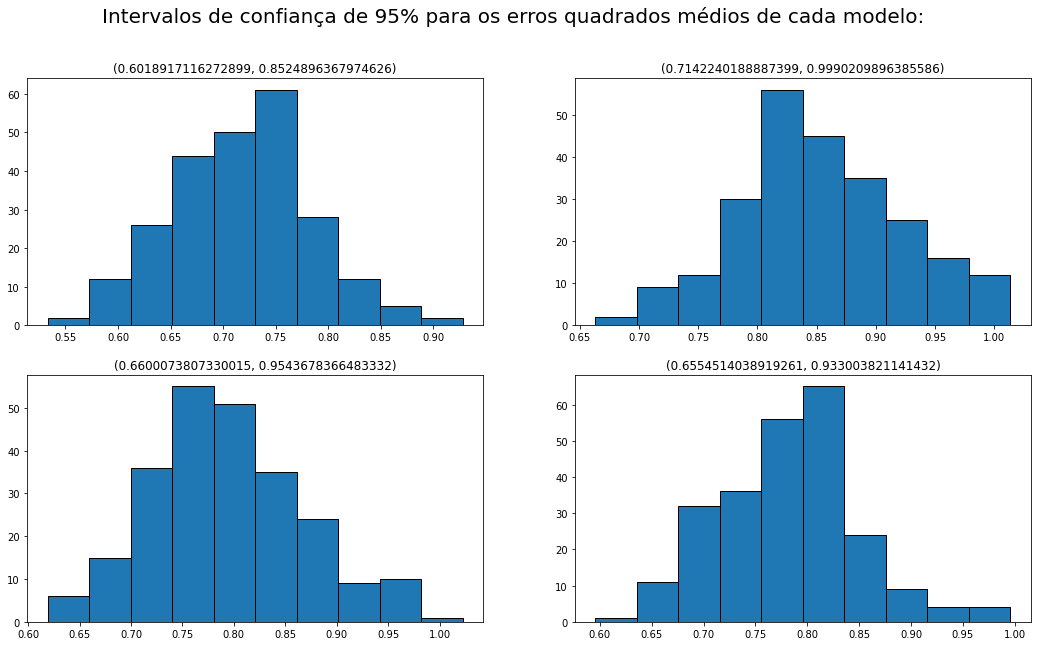

In [75]:
plt.figure(figsize=(18,10))
plt.suptitle("Intervalos de confiança de 95% para os erros quadrados médios de cada modelo:", fontsize=20)

samples = bootstrap_mse(X_train, y_train, lm)
plt.subplot(221)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

samples = bootstrap_mse(X_train, y_train, lasso)
plt.subplot(222)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

samples = bootstrap_mse(X_train, y_train, ridge)
plt.subplot(223)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

samples = bootstrap_mse(X_train, y_train, elasticNet)
plt.subplot(224)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

plt.show()

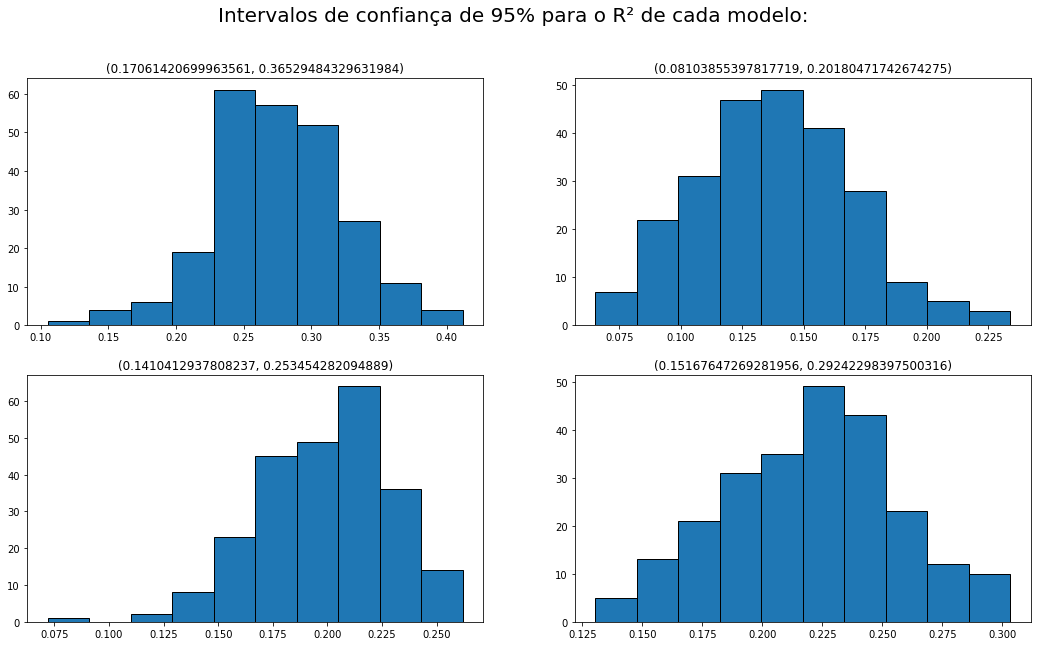

In [76]:
plt.figure(figsize=(18,10))
plt.suptitle("Intervalos de confiança de 95% para o R² de cada modelo:", fontsize=20)

samples = bootstrap_r2(X_train, y_train, lm)
plt.subplot(221)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

samples = bootstrap_r2(X_train, y_train, lasso)
plt.subplot(222)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

samples = bootstrap_r2(X_train, y_train, ridge)
plt.subplot(223)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

samples = bootstrap_r2(X_train, y_train, elasticNet)
plt.subplot(224)
plt.hist(samples, ec='k')
plt.title('({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))

plt.show()

Como podemos ver, os 4 intervalos de confiança possuem sobreposição, o que mostram que nesse caso os erros e os coeficientes de determinação dos 4 modelos são estatisticamente equivalentes, ou seja, escolher qualquer um dos modelos não faz diferença significativa.

Apesar de não haver um modelo muito superior aos demais, vamos escolher a regressão linear múltipla sem regularização para mensurar os erros no teste, uma vez que não há justificativa para utilizar os 4 modelos.

## Z-normalizando dados de teste com média e desvio-padrão do treino

In [77]:
# O x_scaler e y_scaler ainda estão com média e desvio-padrão utilizados para z-normalizar os dados de treino.
X_test_df[['studytime', 'failures', 'absences']] -= X_train_df[['studytime', 'failures', 'absences']].mean()
X_test_df[['studytime', 'failures', 'absences']] /= X_train_df[['studytime', 'failures', 'absences']].std(ddof=1)

y_test = y_scaler.transform(y_test_df.values[:, np.newaxis])

Convertendo para numéricas as variáveis categóricas do teste:

In [78]:
X_test_df['schoolsup'] = X_test_df['schoolsup'].map({'no' : 0, 'yes' : 1})
X_test_df['romantic'] = X_test_df['romantic'].map({'no':0, 'yes':1})
X_test_df['higher'] = X_test_df['higher'].map({'no':0, 'yes':1})
X_test_df['internet'] = X_test_df['internet'].map({'no':0, 'yes':1})
X_test_df = pd.get_dummies(X_test_df, columns=['Mjob', 'Fjob', 'ParentsEdu', 'goout'])
X_test = X_test_df.values

## Mensurando erros nos dados de teste

In [79]:
y_predict = lm.predict(X_test)

Vamos plotar o histograma da distribuição dos erros quadrados médios e do R² para o teste, usando o bootstrap:

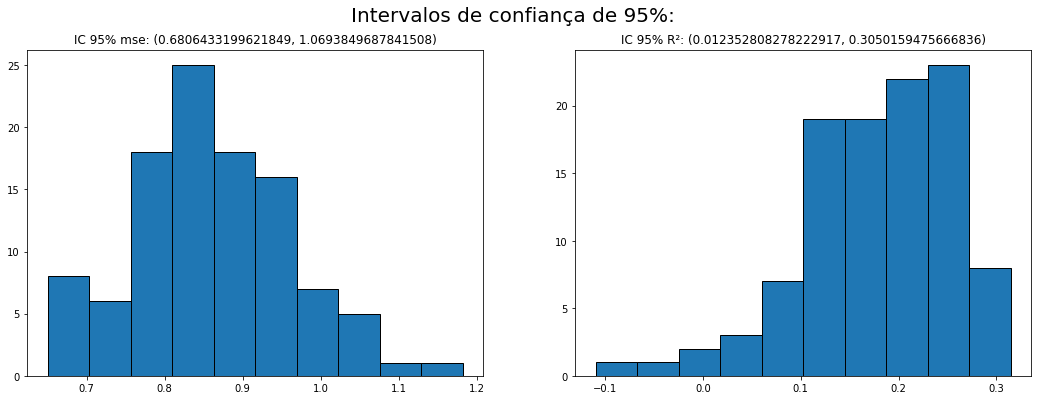

In [80]:
plt.figure(figsize=(18,6))
plt.suptitle("Intervalos de confiança de 95%:", fontsize=20)
plt.subplot(121)
samples = bootstrap_mse(X_test, y_test, lm)
plt.hist(samples, ec='k')
plt.title('IC 95% mse: ({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))
plt.subplot(122)
samples = bootstrap_r2(X_test, y_test, lm)
plt.hist(samples, ec='k')
plt.title('IC 95% R²: ({}, {})'.format(np.percentile(samples, 2.5), np.percentile(samples, 97.5)))
plt.show()

Como podemos ver, o intervalo de confiança para o erro quadrado médio do teste aumentou um pouco em relação ao do treino. Isso ocorreu pelo fato de que trata-se dos dados de teste, que ficaram ocultos durante o treino e são usados para simular uma base real.

Vamos dar uma olhada no coeficiente de determinação do modelo (R²):

In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
print("Coeficiente de determinação (R²): " + str(r2))

Coeficiente de determinação (R²): 0.1942965777272453


Como podemos ver, o R² também diminuiu, pelos mesmos motivos.

Por fim, vamos plotar a reta da regressão linear, comparando a nota média do conjunto de teste com a nota média prevista pelo modelo, com um intervalo de confiança de 95%:

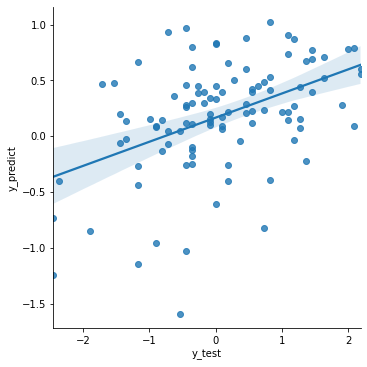

In [82]:
df_teste = pd.DataFrame(y_test, columns=['y_test'])
df_teste['y_predict'] = y_predict
sns.lmplot(x='y_test', y='y_predict', data=df_teste, ci=95, n_boot=10000)
plt.show()

**Conclusão:**

Como podemos ver, o modelo de regressão se revelou incapaz de prever a variável target (nota média). O gráfico acima ilustra bem a razão do coeficiente de determinação ter sido tão baixo (0.194)

# Previsão da aprovação/reprovação através de classificação

O objetivo agora é tentar prever se cada aluno vai passar ou não através de um modelo de classificação.

Antes de tudo, vamos criar uma nova coluna chamada 'pass', que receberá valores binários. Se o(a) aluno(a) possuir uma nota média maior ou igual a 12, ele/ela será aprovado(a), caso contrário, será reprovado(a)!

In [83]:
student['pass'] = np.where(student['gradeAverage'] >= 12, 1, 0)
student[['gradeAverage', 'pass']].head()

,gradeAverage,pass
0,5.67,0
1,5.33,0
2,8.33,0
3,14.67,1
4,8.67,0


## Separando dados de treino e teste

In [84]:
X = student.drop(['pass', 'gradeAverage'], axis=1)

y = student['pass']

In [85]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.3, random_state=42)

## Z-normalizando colunas numéricas do treino

In [86]:
X_train_df[['studytime', 'failures', 'absences']] -= X_train_df[['studytime', 'failures', 'absences']].mean()
X_train_df[['studytime', 'failures', 'absences']] /= X_train_df[['studytime', 'failures', 'absences']].std(ddof=1)
y_train = y_train_df.values[:, np.newaxis].ravel() # Não precisa z-normalizar o y_train_df pois já está como deveria estar (binário)

## Convertendo variáveis categóricas em numéricas

In [87]:
# Como as colunas abaixo são variáveis binárias, a função map é suficiente para convertê-las:
X_train_df['schoolsup'] = X_train_df['schoolsup'].map({'no' : 0, 'yes' : 1})
X_train_df['romantic'] = X_train_df['romantic'].map({'no':0, 'yes':1})
X_train_df['higher'] = X_train_df['higher'].map({'no':0, 'yes':1})
X_train_df['internet'] = X_train_df['internet'].map({'no':0, 'yes':1})

In [88]:
# Fazendo o one-hot encoding:
X_train_df = pd.get_dummies(X_train_df, columns=['Mjob', 'Fjob', 'ParentsEdu', 'goout'])

In [89]:
# Conferindo se o DataFrame está correto:
X_train_df.head()

,studytime,failures,schoolsup,higher,internet,romantic,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,ParentsEdu_2,ParentsEdu_3,ParentsEdu_4,ParentsEdu_5,ParentsEdu_6,ParentsEdu_7,ParentsEdu_8,goout_1,goout_2,goout_3,goout_4,goout_5
79,-0.064668,-0.439648,0,1,1,0,0.690641,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
341,-0.064668,0.978950,0,1,1,0,-0.665425,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
18,-1.268484,3.816147,0,1,1,0,1.142663,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
260,-0.064668,-0.439648,0,1,1,1,1.707691,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
104,-0.064668,-0.439648,0,1,1,0,-0.665425,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [90]:
X_train = X_train_df.values # Agora está pronto para a classificação!

## Escolhendo e treinando o modelo

Para a classificação, iremos utilizar dois modelos: o KNN e a regressão logística:

In [91]:
from sklearn.linear_model import LogisticRegressionCV # Regressão logística com regularização
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.model_selection import StratifiedKFold # Para a validação cruzada

Fazendo validação cruzada e escolhendo os melhores hiperparâmetros:

In [92]:
sk_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_classifier = GridSearchCV(KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                                          'weights': ['uniform', 'distance'],
                                          'metric': ['euclidean', 'manhattan']},
                              verbose=1,
                              cv=sk_fold,
                              n_jobs=-1,
                              refit=True,
                              scoring= 'accuracy')
log_regression = LogisticRegressionCV(Cs=100,
                                      penalty='l2',
                                      cv=sk_fold,
                                      fit_intercept=False,
                                      multi_class='ovr',
                                      scoring= 'accuracy')

In [93]:
knn_classifier.fit(X_train, y_train)
log_regression.fit(X_train, y_train)
clear_output()

Vamos ver qual modelo tem a melhor acurácia no treino:

In [94]:
print("Acurácia do KNN no treino: {}".format(knn_classifier.score(X_train, y_train)))
print("Acurácia da Regressão Logística no treino: {}".format(log_regression.score(X_train, y_train)))

Acurácia do KNN no treino: 0.743801652892562
Acurácia da Regressão Logística no treino: 0.7520661157024794


Como a regressão logística se saiu melhor, usaremos ela nos testes!

## Z-normalizando dados de teste com média e desvio-padrão do treino

In [95]:
# O x_scaler e y_scaler ainda estão com média e desvio-padrão utilizados para z-normalizar os dados de treino.
X_test_df[['studytime', 'failures', 'absences']] -= X_train_df[['studytime', 'failures', 'absences']].mean()
X_test_df[['studytime', 'failures', 'absences']] /= X_train_df[['studytime', 'failures', 'absences']].std(ddof=1)
y_test = y_test_df.values[:, np.newaxis].ravel()

Convertendo para numéricas as variáveis categóricas do teste:

In [96]:
X_test_df['schoolsup'] = X_test_df['schoolsup'].map({'no' : 0, 'yes' : 1})
X_test_df['romantic'] = X_test_df['romantic'].map({'no':0, 'yes':1})
X_test_df['higher'] = X_test_df['higher'].map({'no':0, 'yes':1})
X_test_df['internet'] = X_test_df['internet'].map({'no':0, 'yes':1})
X_test_df = pd.get_dummies(X_test_df, columns=['Mjob', 'Fjob', 'ParentsEdu', 'goout'])
X_test = X_test_df.values

## Mensurando erros nos dados de teste

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
confusion_matrix= pd.crosstab(y_test, log_regression.predict(X_test), rownames=["Actual"], colnames=["predict"])
print(confusion_matrix)

predict   0  1
Actual        
0        59  5
1        34  7


In [99]:
print(classification_report(y_test, log_regression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75        64
           1       0.58      0.17      0.26        41

    accuracy                           0.63       105
   macro avg       0.61      0.55      0.51       105
weighted avg       0.61      0.63      0.56       105



**Interpretando o relatório da classificação e a matriz de confusão:**

**Acurácia**: 63%, ou seja: o modelo previu corretamente 66 de 105 observações.

**Revocação**: 17%, ou seja: dos 41 alunos aprovados, o modelo previu 7 corretamente.

**Precisão**: 58%, ou seja: dos 12 alunos que prevíamos que seriam aprovados, 7 realmente foram aprovados.
